<a href="https://colab.research.google.com/github/krislars/compuphys/blob/main/Ising_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

## Aligned Spins

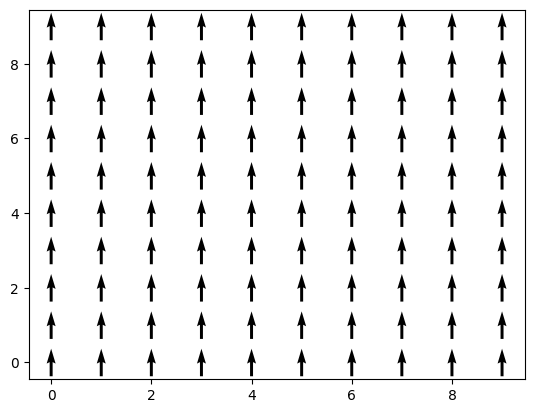

In [ ]:
N=10
spin=np.ones([N,N])
plt.quiver(np.zeros([N,N]),spin,pivot='mid') # args are U and V on meshgrid

In [ ]:
# Apply periodic boundary conditions
x,y=np.mgrid[0:N,0:N]
xup=np.roll(x,1,axis=0)
xdown=np.roll(x,-1,axis=0)
yleft=np.roll(y,1,axis=1)
yright=np.roll(y,-1,axis=1)

In [ ]:
# Energy is -1 * sum of product with each neighbor, so note that
# the lowest energy is when all 4 neighbors are aligned
E_state=-spin*(spin[xup,y]+spin[xdown,y]+spin[x,yleft]+spin[x,yright])
E_state

array([[-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., -4.]])

In [ ]:
np.sum(E_state)/N**2

-4.0

In [ ]:
np.sum(spin)/N**2

1.0

## Random Spins

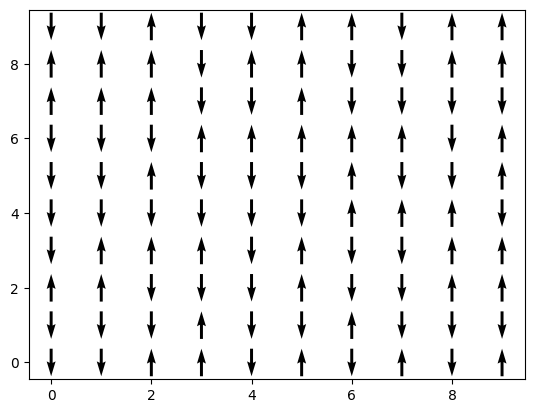

In [ ]:
spin=np.random.choice([-1,1],size=(N,N))
plt.quiver(np.zeros([N,N]),spin,pivot='mid')

In [ ]:
E_state=-1*spin*(spin[xup,y]+spin[xdown,y]+spin[x,yleft]+spin[x,yright])
E_state

array([[-2, -2,  0,  0,  0,  2,  4,  4,  2,  2],
       [-2, -2,  0,  2, -2,  2,  4,  0, -2,  0],
       [ 0,  0,  0,  0, -2,  2,  0, -2,  0, -2],
       [ 2,  0,  0,  2,  0,  2,  0,  0, -2,  0],
       [-4, -2,  0, -2, -4,  0,  0,  0,  0,  2],
       [-2, -2,  4,  0, -2,  0,  0,  2,  0,  2],
       [ 0, -2,  2,  2,  0, -2, -2,  2,  0,  2],
       [ 0, -2,  0,  0,  2,  0,  0, -2, -2,  2],
       [-2, -2, -2,  0,  2, -2,  0, -2,  0, -2],
       [ 0,  0,  0,  0,  0, -2,  2,  2,  0, -2]])

In [ ]:
np.sum(E_state)/N**2

-0.08

In [ ]:
np.sum(spin)/N**2

-0.08

## Let Spins Flip to Lower Energy

In [ ]:
kT=3.5

In [ ]:
# Choose one:
# spin=np.random.choice([-1,1],size=(N,N)) # hot start
spin=np.ones([N,N]) # cold start

In [ ]:
M=np.array([np.sum(spin)])
E=np.array([np.sum(-1*spin*(spin[xup,y]+spin[xdown,y]+spin[x,yleft]+spin[x,yright]))])
M,E

(array([100.]), array([-400.]))

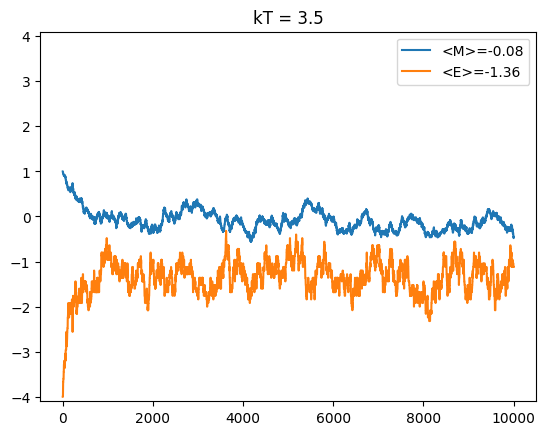

In [ ]:
# Flipping a spin changes the sign of the energy. So, when the energy state
# is positive, flipping the state yields a lower energy.


# run enough times so that every site is checked often
for t in range(10000):
    E_state=-1*spin*(spin[xup,y]+spin[xdown,y]+spin[x,yleft]+spin[x,yright])
    i=np.random.choice(N)
    j=np.random.choice(N)
    if E_state[i,j]>=0: # dE is negative
        spin[i,j]=-1*spin[i,j]
    else:
        dE=-E_state-E_state # dE = -2*E_state is positive
        chance=np.random.rand()
        if chance<np.exp(-dE[i,j]/kT):
            spin[i,j]=-1*spin[i,j]
    M=np.append(M,np.sum(spin))
    E=np.append(E,np.sum(E_state))
# plt.quiver(np.zeros([N,N]),spin,pivot='mid')
# plt.title("M = "+str(np.sum(spin)))
# plt.show()
plt.ylim(-4.1,4.1)
plt.plot(M/(N*N),label="<M>="+str(round(np.average(M)/(N*N),2)))
plt.plot(E/(N*N),label="<E>="+str(round(np.average(E)/(N*N),2)))
plt.title('kT = '+str(kT))
plt.legend()
plt.show()

In [ ]:
M[-5:]

array([ 0., -2., -2., -2.,  0.])